In [26]:
import numpy as np                                                              # Importing libraries
import pandas as pd                                                             # Importing Numpy & Pandas for data processing & data wrangling
import seaborn as sns                                                           # Importing tools for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression                               # Import linear regression model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [28]:
import warnings                                                                 # Library used for ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
from google.colab import files
uploaded = files.upload()

Saving Car Dataset.csv to Car Dataset (1).csv


In [30]:
car = pd.read_csv("Car Dataset.csv")                                            # Load Dataset
car.head()                                                                      # View top 5 rows of the dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
data_info = car.info()                                                          # Checking information about the dataset using info
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [92]:
print("Number of Rows: ",car.shape[0])                                          # Dataset Rows & Columns count
print("Number of Columns: ",car.shape[1])                                       # Checking number of rows and columns of the dataset using shape

Number of Rows:  301
Number of Columns:  10


In [98]:
features = [i for i in car.columns if i not in ['Selling_Price']]               # Features of the dataset
features

['Car_Name',
 'Year',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner',
 'Car_Age']

In [94]:
for i in car.columns.tolist():                                                   # Checking unique values in each column#
  print("Number of Unique Values in",i,"are",car[i].nunique())

Number of Unique Values in Car_Name are 98
Number of Unique Values in Year are 16
Number of Unique Values in Selling_Price are 156
Number of Unique Values in Present_Price are 148
Number of Unique Values in Driven_kms are 206
Number of Unique Values in Fuel_Type are 3
Number of Unique Values in Selling_type are 2
Number of Unique Values in Transmission are 2
Number of Unique Values in Owner are 3
Number of Unique Values in Car_Age are 16


In [32]:
missing_values = car.isnull().sum()                                             # Missing Values/Null Values Count
missing_values

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [33]:
statistics = car.describe()                                                     # Dataset Describe (all columns included)
statistics

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [59]:
from datetime import datetime

current_year = datetime.now().year                                              # Feature Engineering: Add 'Car_Age' column
car['Car_Age'] = current_year - car['Year']

car_data = car.drop(['Car_Name', 'Year'], axis=1)                               # Drop the 'Car_Name' and 'Year' columns (unnecessary for modeling)

# Encode categorical variables using one-hot encoding
car_data_encoded = pd.get_dummies(car, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [60]:
car_data_encoded_head = car_data_encoded.head()                                 # Display names of the processed dataset's first few rows
car_data_encoded_head

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,11,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,12,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,8,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,14,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,11,True,False,False,True


In [61]:
car_data_encoded_columns = car_data_encoded.columns.tolist()                    # Display names of the processed dataset's first few rows
car_data_encoded_columns

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Driven_kms',
 'Owner',
 'Car_Age',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Individual',
 'Transmission_Manual']

In [62]:
print(car_data_encoded.dtypes)                                                  # Check for non-numeric columns

Car_Name                    object
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Car_Age                      int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object


In [63]:
print(car_data_encoded.head())                                                  # Verify encoding

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  \
0     ritz  2014           3.35           5.59       27000      0       11   
1      sx4  2013           4.75           9.54       43000      0       12   
2     ciaz  2017           7.25           9.85        6900      0        8   
3  wagon r  2011           2.85           4.15        5200      0       14   
4    swift  2014           4.60           6.87       42450      0       11   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
0             False              True                    False   
1              True             False                    False   
2             False              True                    False   
3             False              True                    False   
4              True             False                    False   

   Transmission_Manual  
0                 True  
1                 True  
2                 True  
3                 True  
4        

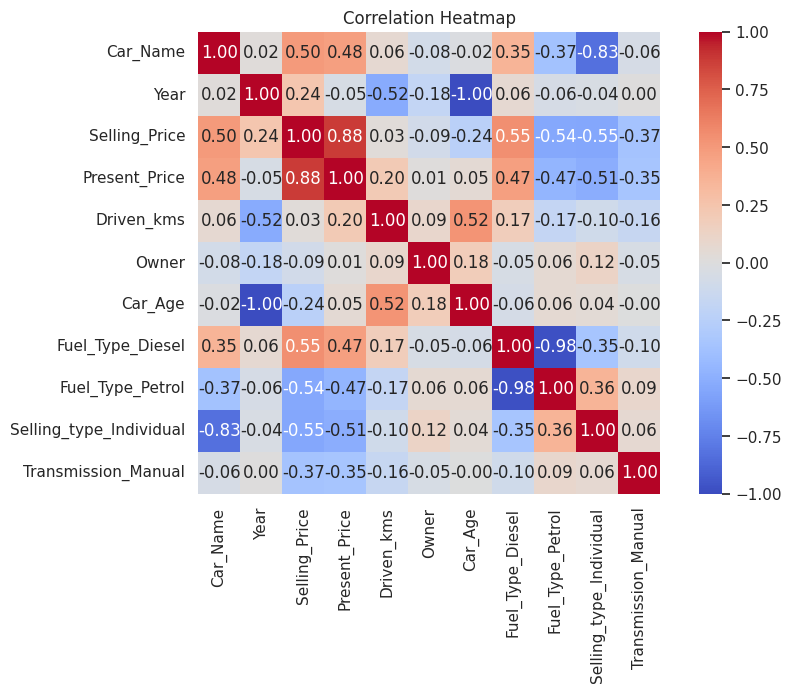

In [64]:
# Encode categorical columns

label_encoders = {}                                                             # Dictionary to store label encoders (if needed later)
for col in car_data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    car_data_encoded[col] = le.fit_transform(car_data_encoded[col])
    label_encoders[col] = le                                                    # Store encoder for inverse transformation if needed

sns.set(style="whitegrid")                                                      # Set plot style

plt.figure(figsize=(10, 6))                                                     # Visualize correlations between numerical features and Selling_Price
correlation_matrix = car_data_encoded.corr()                                    # Now all columns are numeric
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

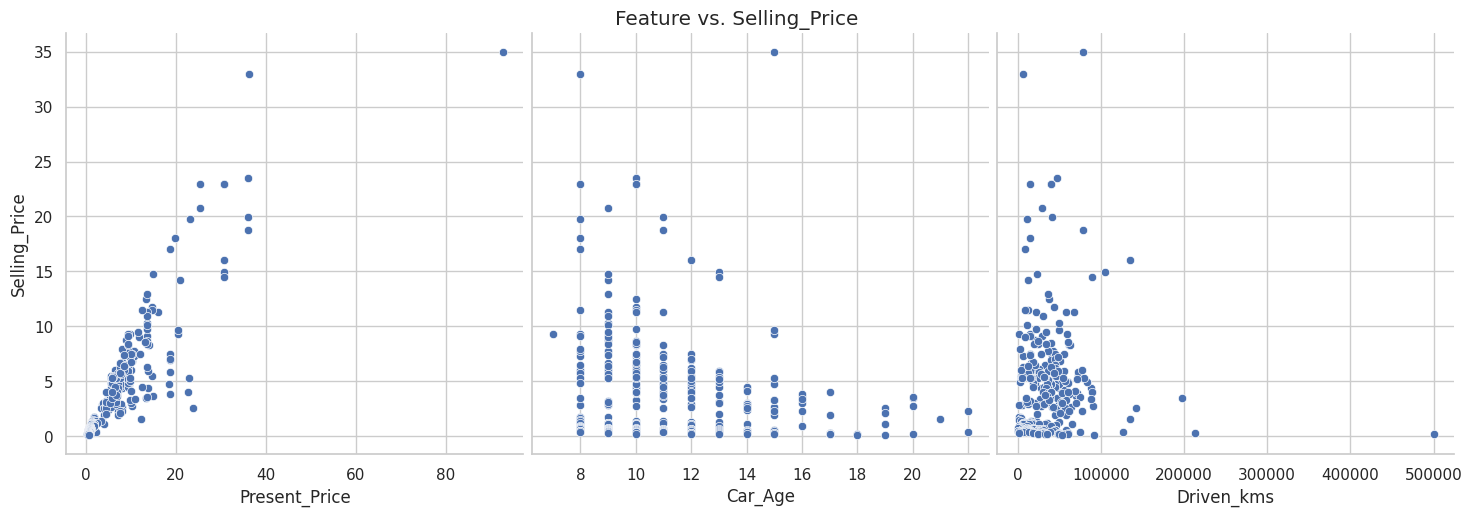

In [67]:
sns.pairplot(
    car_data_encoded,
    x_vars=['Present_Price', 'Car_Age', 'Driven_kms'],
    y_vars='Selling_Price',
    height=5,
    aspect=1
)
plt.suptitle("Feature vs. Selling_Price", y=1.02)
plt.show()

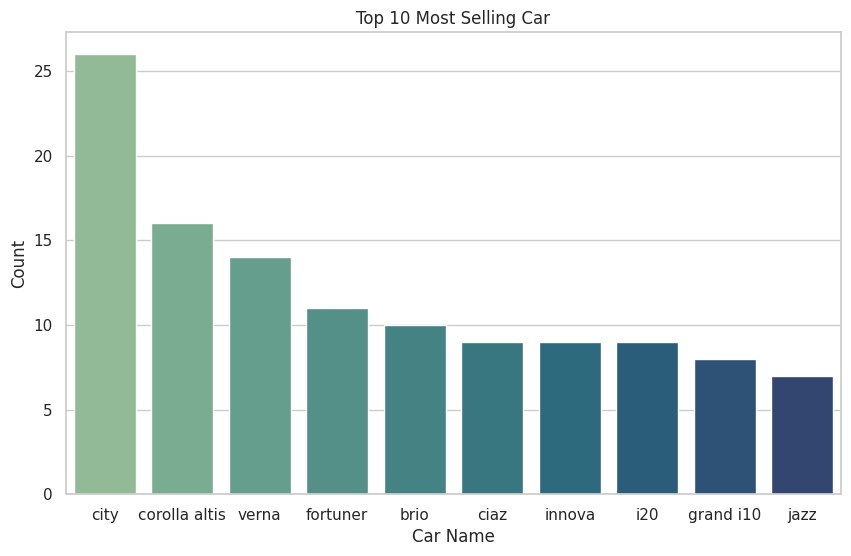

In [90]:
# Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car

top10 = car['Car_Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))                                                     # Create a count plot to visualize the top 10 car
sns.countplot(x='Car_Name', data=car, order=top10.index, palette='crest')

plt.xlabel('Car Name')                                                          # Set labels and title for the plot
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

plt.show()                                                                      # Display the plot

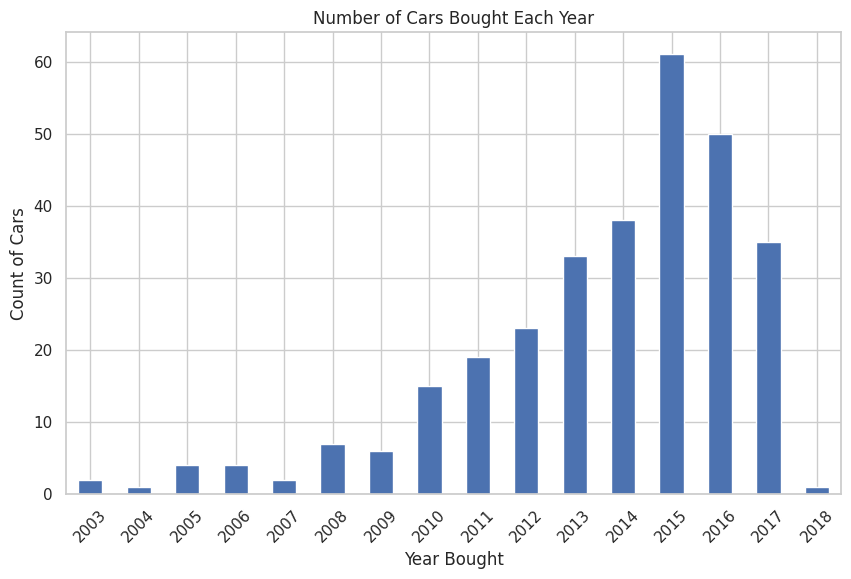

In [91]:
# Bar plot visualization code for Number of Cars Bought Each Year

yearly_counts = car.groupby('Year').count()['Car_Name']                         # Group the data by the 'Year' column and count the number of occurrences for each year

plt.figure(figsize=(10, 6))                                                     # Set the figure size for the plot
yearly_counts.plot(kind='bar')                                                  # Create a bar plot to visualize the count of cars bought in each year
plt.xticks(rotation=45)                                                         # Rotate the x-axis labels by 45 degrees for better readability

plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')
plt.show()

In [69]:
X = car_data_encoded.drop('Selling_Price', axis=1)                              # Split the data into features (X) and target (y)
y = car_data_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                   # Train-test split (80% training, 20% testing)

model = LinearRegression()                                                      # Initialize and train the Linear Regression model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)                                                  # Make predictions on the test set

mse = mean_squared_error(y_test, y_pred)                                        # Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.48
R-squared: 0.85


In [19]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [77]:
%%writefile carapp.py

# Streamlit App
st.title("Car Price Prediction App")
st.write("Enter the details of the car to predict its price.")

# Input fields for user data
present_price = st.number_input("Present Price (in lakhs)", min_value=0.0, step=0.1)
driven_kms = st.number_input("Driven Kilometers", min_value=0, step=100)
owner = st.selectbox("Number of Owners", [0, 1, 2, 3])
car_age = st.number_input("Car Age (in years)", min_value=0, step=1)
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG"])
transmission = st.selectbox("Transmission", ["Manual", "Automatic"])
seller_type = st.selectbox("Seller Type", ["Dealer", "Individual"])

# Encode inputs
fuel_type_diesel = 1 if fuel_type == "Diesel" else 0
fuel_type_petrol = 1 if fuel_type == "Petrol" else 0
seller_type_individual = 1 if seller_type == "Individual" else 0
transmission_manual = 1 if transmission == "Manual" else 0

# Predict price
if st.button("Predict Price"):
    features = np.array([[present_price, driven_kms, owner, car_age, fuel_type_diesel,
                          fuel_type_petrol, seller_type_individual, transmission_manual]])
    prediction = model.predict(features)
    st.success(f"Estimated Selling Price: ₹{prediction[0]:,.2f} lakhs")

Writing carapp.py


In [86]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
changed 22 packages in 2s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [89]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.209.124:8501

⠼⠴⠦⠧⠇⠏your url is: https://shy-rice-vanish.loca.lt
  Stopping...
^C
